#  Indian Employment & AI Risk Analysis
**Objective:** Analyzing salary distributions, industry trends, and the perceived impact of AI on the Indian workforce.
**Dataset Size:** 1,388 Verified Records | 17 Analytical Columns

1. Data Loading and Initial Exploration: In this section, we load the raw dataset and essential libraries (Pandas, Numpy). Perform an initial check on the data shape and structure to understand the scale of the information we are working with.

In [31]:
import pandas as pd
import numpy as np 
import re

df = pd.read_csv("Messy_Employment_India_Dataset.csv")
df.shape
df.head()

,Status,Age Group,Education,Industry,Location,AI Risk,Years of Experience,Monthly Salary (INR),Date Recorded
0,EMPLOYED,25_34,high school,Technology,Urban,NaN,NaN,40700.0,1/1/2023
1,EMPLOYED,18-24,Diploma,Fintech,rural,moderate,NaN,17500.0,1/2/2023
2,EMPLOYED,25_34,High School,Retail,Delhi,Low,16.0,77600.0,1/3/2023
3,UNEMPLOYED,18-24,Masters,Retail,Urban,Low,30.0,100200.0,1/4/2023
4,NaN,45-54,Diploma,Fintech,Hyderabad,low,9.0,19500.0,1/5/2023


2. Standardizing Column Names: The raw headers contained spaces and inconsistent casing. This code strips whitespace, replaces spaces with underscores, and converts names to Title Case to ensure easy and error-free coding in later steps

In [32]:
df.columns = df.columns.str.strip().str.title().str.replace(' ', '_').str.replace('[^0-9a-zA-Z_]', '', regex=True)
Columns = df.columns.tolist()
print(Columns)

['Status', 'Age_Group', 'Education', 'Industry', 'Location', 'Ai_Risk', 'Years_Of_Experience', 'Monthly_Salary_Inr', 'Date_Recorded']


3. Handling Missing Values in 'Status': Employment status is a primary variable. We remove rows where status is missing and standardize the text to 'Employed' or 'Unemployed' to fix inconsistent entries like 'EMPLOYED' or 'unemployed'.

In [33]:
df = df.dropna(subset=['Status'])
df['Status'] = df['Status'].str.strip().str.title()
df.shape
df['Status'].head()


0      Employed
1      Employed
2      Employed
3    Unemployed
5    Unemployed
Name: Status, dtype: object

4. Normalizing Age Groups: Age data was messy with different separators (e.g., '25_34' vs '25-34'). This code uses string replacement to ensure all age ranges follow a consistent 'XX-YY' format and fills missing values with 'Not Specified'.

In [34]:
df['Age_Group'] = df['Age_Group'].str.replace('_', '-').str.replace(r'\s+to\s+', '-', regex=True).fillna("Not Specified")
df['Age_Group'].head()

0    25-34
1    18-24
2    25-34
3    18-24
5    25-34
Name: Age_Group, dtype: object

5. Consolidating Education Categories: To reduce redundancy (e.g., 'Master' vs 'Masters'), we apply a mapping dictionary. This groups similar degrees into clean categories like 'Bachelors', 'Masters', 'PhD', and 'Diploma'.

In [35]:
df['Education'] =df['Education'].str.strip()
edu_map = {
    'high school': 'High School', 'High School': 'High School',
    'Masters': 'Masters', 'Master': 'Masters',
    'PhD': 'PhD', 'Ph.D': 'PhD',
    'Bachelors': 'Bachelors', "Bachelor's": 'Bachelors',
    'Diploma': 'Diploma'
}
df['Education'] =df['Education'].map(edu_map).fillna('Not Specified')
#df[['Status','Age Group','Education']].head(20)

6. Cleaning Industry Sectors: We group specific sub-sectors into broader categories (e.g., moving 'Fintech' into 'Technology') and handle missing industry data by labeling it as 'Other'.

In [36]:
industry_map= {
    'Tech': 'Technology', 
    'Health': 'Healthcare',
    'Fintech': 'Technology'
}
df['Industry'] = df['Industry'].str.strip().str.title().replace(industry_map).fillna("Other")
#df[['Status','Age_Group','Education','Industry']].head(20)
df['Industry'].unique()

array(['Technology', 'Retail', 'Other', 'Healthcare', 'Education',
       'Finance'], dtype=object)

7. Fixing Location Entries: This step cleans the 'Location' column by fixing typos (like 'Suburban' to 'Sub Urban') and ensuring all city names and area types are consistently capitalized.

In [37]:
df['Location'] = df['Location'].str.strip().str.title().replace('Suburban', 'Sub Urban').fillna("Unknown")
#df[['Status','Age_Group','Education','Industry','Location']].head(30)

8. Standardizing AI Risk Perception: The risk levels were inconsistent. We map 'Moderate' to 'Medium' and standardize casing to ensure the data is ready for categorical analysis and heatmaps.

In [38]:
df['Ai_Risk'] = df['Ai_Risk'].str.strip().str.capitalize().replace('Moderate','Medium').fillna('Not Rated')
#df[['Status','Age_Group','Education','Industry','Location','Ai_Risk']].head(30)

9. Cleaning Years of Experience: We fill missing experience values with '0' (assuming entry-level) and convert the column from float to integer to remove unnecessary decimals.

In [39]:
#Filling missing values with 0 and convert float type into int 
df['Years_Of_Experience'] = df['Years_Of_Experience'].fillna(0).astype(int)
#print(df['Years_Of_Experience'].max())
#df['Years_Of_Experience'].head(10)

In [40]:
df = df.dropna(subset={'Monthly_Salary_Inr'})

#df[['Status','Age_Group','Education','Industry','Location','Ai_Risk','Years_Of_Experience','Monthly_Salary_Inr']].head(20)

10. Converting Date Recorded: We convert the 'Date_Recorded' column into a proper Python Datetime object. This is crucial for extracting time-based features like Month and Year for trend analysis.

In [41]:
# Convert to Datetime object (The "Data Type" remains datetime64[ns])
df['Date_Recorded'] = pd.to_datetime(df['Date_Recorded'], errors='coerce')

# Check the type
print(df['Date_Recorded'].dtype) 

#  View the data
df['Date_Recorded'].isna().sum()
df['Date_Recorded'].head()


datetime64[ns]


0   2023-01-01
1   2023-01-02
2   2023-01-03
3   2023-01-04
5   2023-01-06
Name: Date_Recorded, dtype: datetime64[ns]

11.Creating Salary Tiers: To simplify salary analysis, we categorize the monthly income into three logical buckets: 'Low Income', 'Mid Income', and 'High Income'.

In [42]:
#Create Salary Tier
def Salary_Tier(sal):
    if sal <= 30000:
        return "Low Income"
    elif 30000 <= sal <= 70000:
        return "Mid Income"
    else:
        return "High Income"
    
df['Salary_Tier'] = df['Monthly_Salary_Inr'].apply(Salary_Tier)
df['Salary_Tier'] 

0        Mid Income
1        Low Income
2       High Income
3       High Income
5        Mid Income
           ...     
1994     Low Income
1995    High Income
1996    High Income
1998    High Income
1999     Mid Income
Name: Salary_Tier, Length: 1388, dtype: object

12. Defining Career Stages: We transform the numerical 'Years_of_Experience' into categorical career stages: 'Fresher' (0-2 years), 'Mid Level' (3-10 years), and 'Senior' (11+ years).

In [43]:
def Experience_level(exp):
    if exp <= 2: return "Fresher"
    elif 3 <= exp <= 10: return "Mid Level"
    else: return "Senior"

df['Experience_level'] = df['Years_Of_Experience'].apply(Experience_level)
df['Experience_level']

0       Fresher
1       Fresher
2        Senior
3        Senior
5       Fresher
         ...   
1994    Fresher
1995    Fresher
1996     Senior
1998     Senior
1999    Fresher
Name: Experience_level, Length: 1388, dtype: object

13. Calculating Annual Salary in Lakhs (LPA): Since Indian salaries are often discussed in Lakhs Per Annum, we convert the monthly INR to yearly LPA. We keep this as a numeric float to allow for mathematical calculations.

In [44]:
#Calculate Annual Salary in Lakhs (LPA)
df['Annual_Salary_Inr'] = ((df['Monthly_Salary_Inr']*12)/100000).round(1)
#df['Annual_Salary_Inr'] = df['Annual_Salary_Inr'].astype(str)+' LPA'
df['Annual_Salary_Inr']

0        4.9
1        2.1
2        9.3
3       12.0
5        6.5
        ... 
1994     1.1
1995    13.6
1996    12.3
1998    11.1
1999     5.2
Name: Annual_Salary_Inr, Length: 1388, dtype: float64

14. Identifying Metro vs Non-Metro: This logic creates a binary column to check if the employee is located in a major Indian Tier-1 city (Delhi, Mumbai, Bangalore, Hyderabad) to analyze the 'Metro Premium' in salaries.

In [45]:
metro_cities =['Delhi', 'Mumbai', 'Bangalore', 'Hyderabad']
df['Is_Metro'] = df['Location'].apply(lambda x:"Yes" if x in metro_cities else "No")
df['Is_Metro']

0        No
1        No
2       Yes
3        No
5       Yes
       ... 
1994     No
1995    Yes
1996     No
1998    Yes
1999     No
Name: Is_Metro, Length: 1388, dtype: object

15. Extracting Month and Year: Using the Datetime object created earlier, we extract the Month name and Year into separate columns to help identify seasonal trends in the data.

In [46]:
df['Year'] = df['Date_Recorded'].dt.year
df['Month'] = df['Date_Recorded'].dt.month_name()

16. Isolating High AI Risk Jobs: We create a simple 'Yes/No' flag for jobs labeled as 'High' risk. This simplifies our AI impact analysis and makes it easier to compare against salary levels.

In [47]:
df['Is_High_Ai_Risk'] = df['Ai_Risk'].apply(lambda x: "Yes" if x == 'High' else "No")
df['Is_High_Ai_Risk']

0        No
1        No
2        No
3        No
5       Yes
       ... 
1994     No
1995     No
1996     No
1998    Yes
1999     No
Name: Is_High_Ai_Risk, Length: 1388, dtype: object

17. Broad Education Grouping: We further group degrees into 'Postgraduate', 'Graduate', and 'Undergraduate' to see the broader impact of education levels on employment status.

In [48]:
def Education_Group(edu):
    if edu in['PhD', 'Masters']: return 'Postgraduate'
    elif edu in ['Bachelors', 'Diploma']: return 'Graduate'
    else: return 'Undergraduate'

df['Education_Group'] = df['Education'].apply(Education_Group)
df['Education_Group']

0       Undergraduate
1            Graduate
2       Undergraduate
3        Postgraduate
5        Postgraduate
            ...      
1994         Graduate
1995     Postgraduate
1996     Postgraduate
1998    Undergraduate
1999    Undergraduate
Name: Education_Group, Length: 1388, dtype: object

18. Final Data Quality Check: Before proceeding to visualizations, we print a summary of the data shape, null counts, and basic statistics to ensure the dataset is 100% clean and reliable.

In [49]:
print("📊 FINAL DATA QUALITY SUMMARY")
print("="*50)
print(f"Records: {df.shape[0]:,}")
print(f"Columns: {df.shape[1]}")
print(f"Zero missing values: {df.isnull().sum().sum() == 0}")


# Clean describe output
print("\n💰 MONEY STATS:")
print(df[['Monthly_Salary_Inr', 'Annual_Salary_Inr']].describe())

📊 FINAL DATA QUALITY SUMMARY
Records: 1,388
Columns: 17
Zero missing values: True

💰 MONEY STATS:
       Monthly_Salary_Inr  Annual_Salary_Inr
count         1388.000000        1388.000000
mean         77201.945245           9.264841
std          41563.969033           4.985748
min           5100.000000           0.600000
25%          41600.000000           5.000000
50%          77350.000000           9.300000
75%         112900.000000          13.500000
max         149900.000000          18.000000




Visualization Setup Activated the libraries (Matplotlib and Seaborn) to prepare for the graphs.


In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

1. Market Share of Salary Tiers
This calculates the frequency of each 'Salary Tier' (Low, Mid, High) and plots them as a solid pie chart using a pastel color palette.

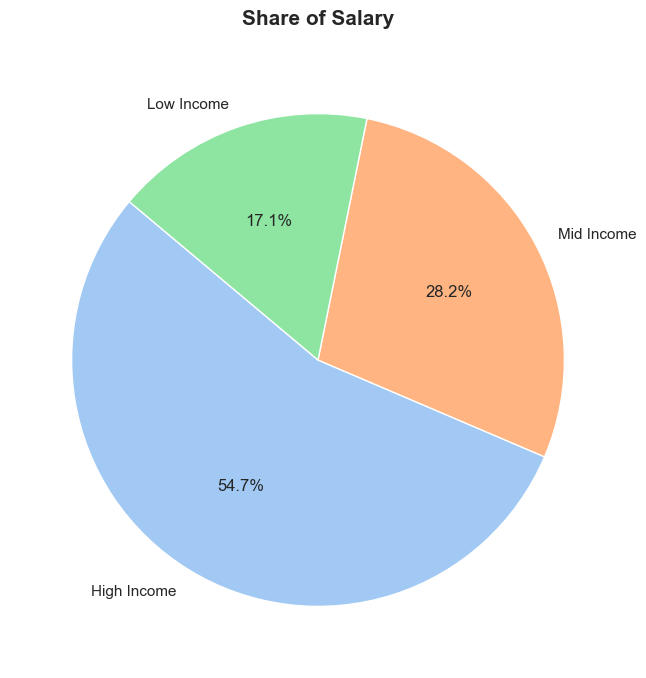

In [51]:
plt.figure(figsize=(8, 8))
data_tier = df['Salary_Tier'].value_counts()
# Choose a nice professional color palette
colors_pie = sns.color_palette('pastel')[0:len(data_tier)]

plt.pie(data_tier, 
        labels=data_tier.index, 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=colors_pie,
        wedgeprops={'edgecolor': 'white', 'linewidth': 1}) # Adds a thin white border between slices

plt.title('Share of Salary', fontsize=15, fontweight='bold', pad=20)
plt.show()

2. Salary Variance by Industry
Using Seaborn’s boxplot, this code visualizes the distribution of salaries across different sectors. It includes the 'hue' parameter to ensure compatibility with the latest library versions.

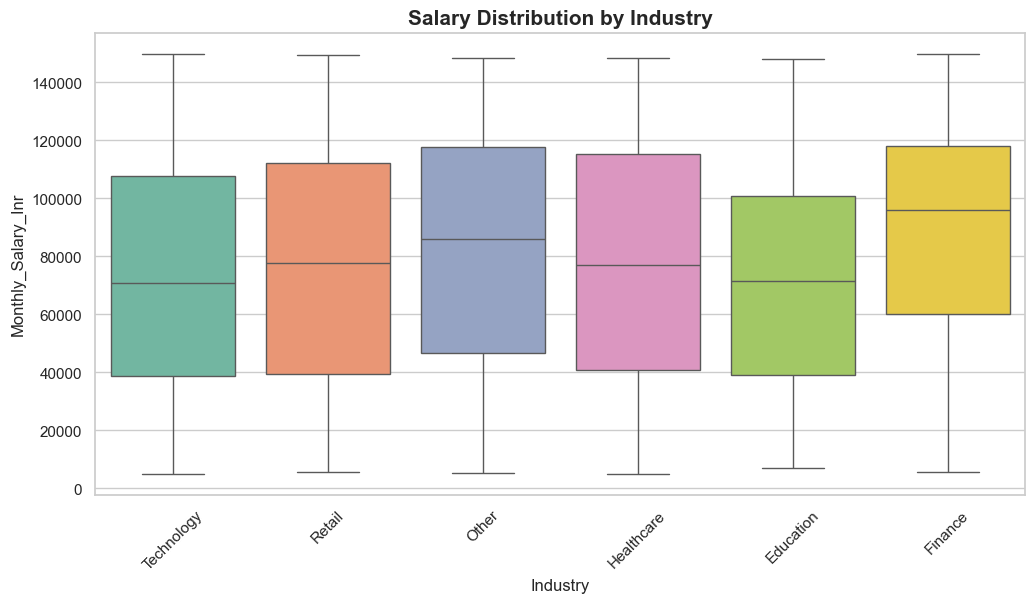

In [52]:
plt.figure(figsize=(12, 6))

sns.boxplot(data=df, x='Industry', y='Monthly_Salary_Inr', hue='Industry', palette='Set2', legend=False)

plt.title('Salary Distribution by Industry', fontsize=15, fontweight='bold')
plt.xticks(rotation=45)
plt.show()

3. AI Risk Exposure across Industries
This code performs a cross-tabulation between 'Industry' and 'AI Risk' levels. It then creates a stacked bar chart where each bar represents a total industry count, divided by risk color.

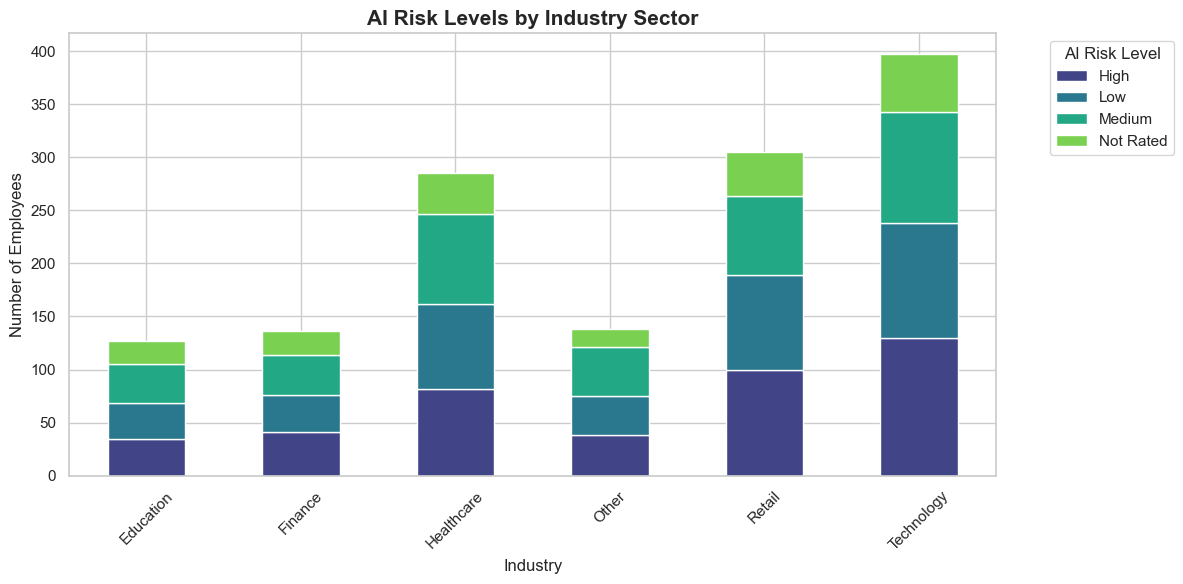

In [53]:
risk_counts = df.groupby(['Industry', 'Ai_Risk']).size().unstack().fillna(0)

# Plotting
risk_counts.plot(kind='bar', stacked=True, figsize=(12, 6), color=sns.color_palette('viridis', 4))

plt.title('AI Risk Levels by Industry Sector', fontsize=15, fontweight='bold')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)
plt.legend(title='AI Risk Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

4. Impact of Experience on Compensation
This cell groups the data by 'Experience Level' (Fresher, Mid, Senior) and calculates the mean salary for each. It uses the 'magma' palette for a high-contrast professional look.

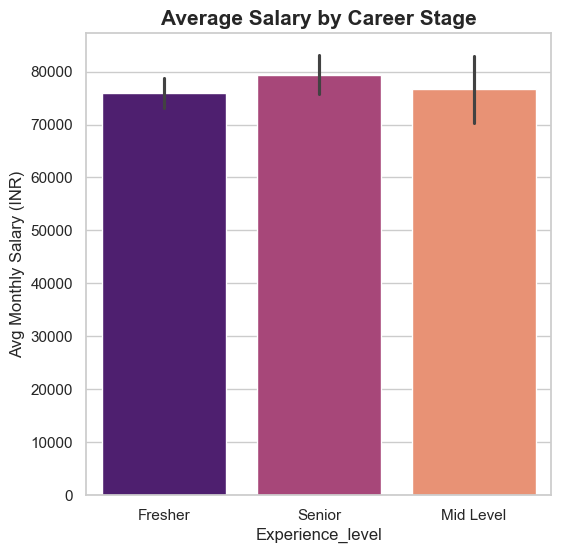

In [54]:
plt.figure(figsize=(6, 6))

# This shows the average salary for each experience level
sns.barplot(data=df, x='Experience_level', y='Monthly_Salary_Inr', hue='Experience_level', palette='magma', legend=False)

plt.title('Average Salary by Career Stage', fontsize=15, fontweight='bold')
plt.ylabel('Avg Monthly Salary (INR)')
plt.show()

5. Overall Employment Status Ratio
This code calculates the ratio of 'Employed' vs. 'Unemployed' individuals. By adding a white central circle to a standard pie chart, it creates a clean 'Donut' visual.

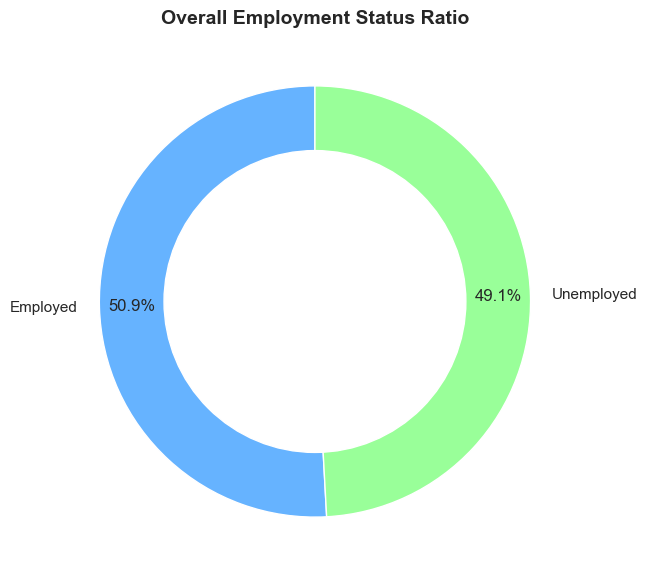

In [55]:
plt.figure(figsize=(7, 7))
status_data = df['Status'].value_counts()
plt.pie(status_data, labels=status_data.index, autopct='%1.1f%%', 
        startangle=90, colors=['#66b3ff','#99ff99','#ffcc99'], pctdistance=0.85)
# Making it a Donut
centre_circle = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Overall Employment Status Ratio', fontsize=14, fontweight='bold')
plt.show()

6. Generational AI Risk Perception This heatmap correlates Age Groups with AI Risk levels. It identifies 'Anxiety Hotspots'—for example, whether younger professionals (18-24) perceive higher job risks compared to senior generations. The darker red areas indicate higher concentrations of responses.

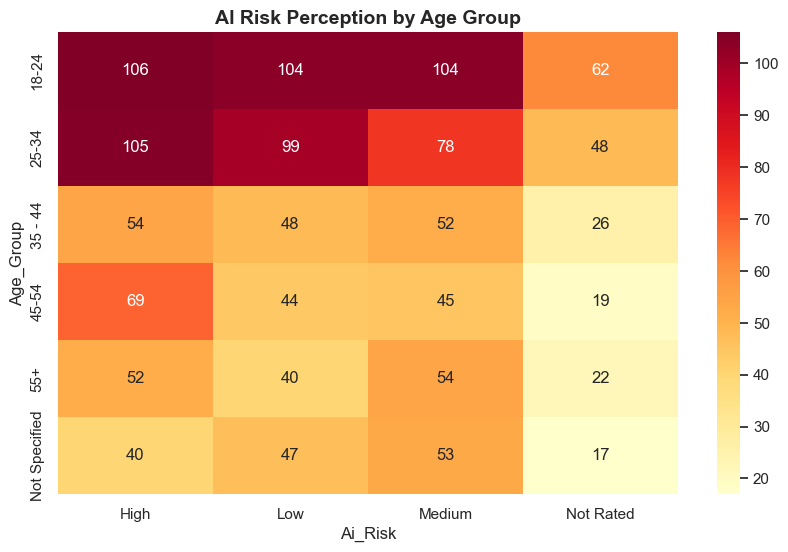

In [56]:
plt.figure(figsize=(10, 6))
# Create a cross-tabulation table first
risk_age_matrix = pd.crosstab(df['Age_Group'], df['Ai_Risk'])
sns.heatmap(risk_age_matrix, annot=True, fmt='d', cmap='YlOrRd')
plt.title('AI Risk Perception by Age Group', fontsize=14, fontweight='bold')
plt.show()

7. Salary Density across Age Groups  Using a Violin plot, we visualize not just the average salary, but the density of where most people earn. This shows the 'Career Peak'—the age at which the distribution shifts toward the high-income tail.

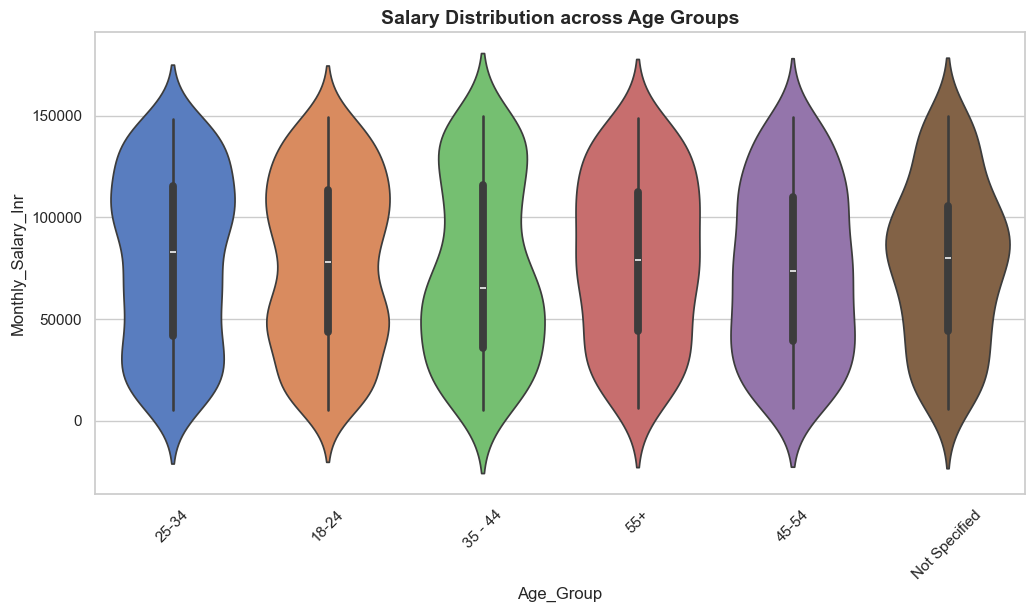

In [57]:
plt.figure(figsize=(12, 6))

sns.violinplot(data=df, x='Age_Group', y='Monthly_Salary_Inr', 
               hue='Age_Group', palette='muted', legend=False)
plt.title('Salary Distribution across Age Groups', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.show()

8. Employment Stability by Education Group This grouped bar chart compares Employment vs. Unemployment across Postgraduate, Graduate, and Undergraduate levels. It highlights which educational background currently faces the highest job search difficulty.

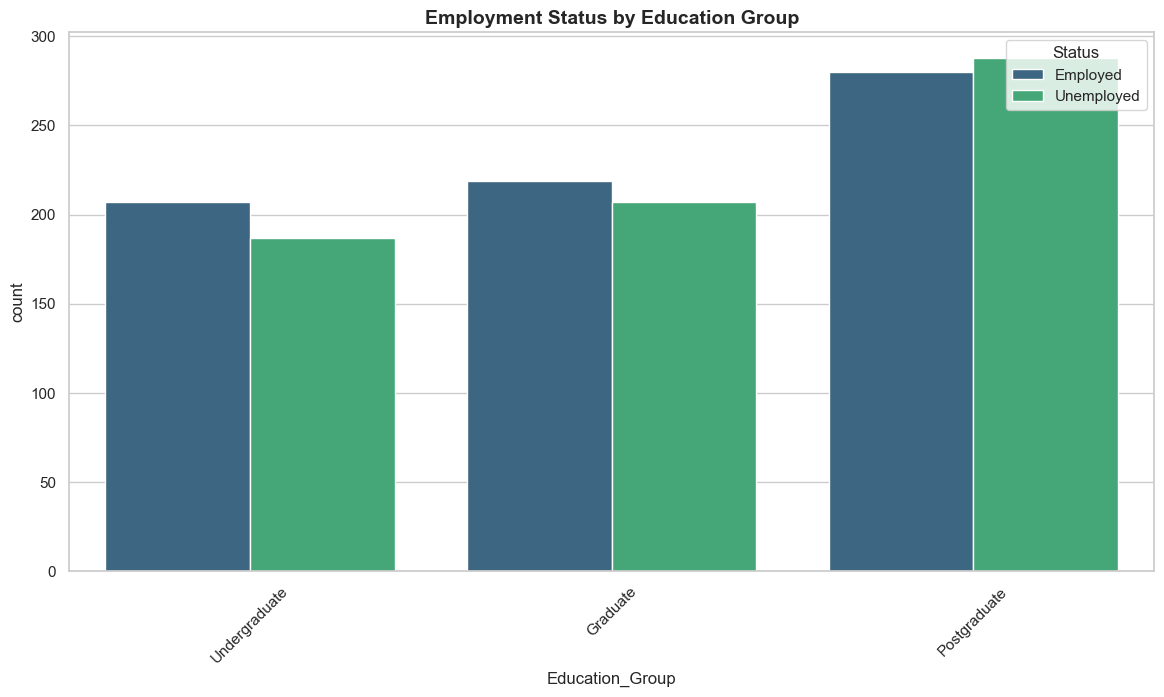

In [58]:
plt.figure(figsize=(14, 7))
sns.countplot(data=df, x='Education_Group', hue='Status', palette='viridis')
plt.title('Employment Status by Education Group', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.legend(title='Status', loc='upper right')
plt.show()

In [59]:
# Calculations for KPIs
total_records = len(df)
avg_monthly_salary = df['Monthly_Salary_Inr'].mean()
avg_lpa = df['Annual_Salary_Inr'].mean()
employment_rate = (df[df['Status'] == 'Employed'].shape[0] / total_records) * 100
high_ai_risk_pct = (df[df['Ai_Risk'] == 'High'].shape[0] / total_records) * 100

# Top Performing Industry
top_industry = df.groupby('Industry')['Monthly_Salary_Inr'].mean().idxmax()
top_industry_val = df.groupby('Industry')['Monthly_Salary_Inr'].mean().max()

# Professional Display (Executive Dashboard)
print("=" * 50)
print("📊 EXECUTIVE EMPLOYMENT SUMMARY (INDIA)")
print("=" * 50)
print(f"👥 Total Workforce Sampled : {total_records:,}")
print(f"💼 Employment Rate         : {employment_rate:.1f}%")
print(f"💵 Avg. Monthly Income     : ₹{avg_monthly_salary:,.0f}")
print(f"🚀 Avg. Annual LPA         : {avg_lpa:.1f} Lakhs")
print(f"⚠️  High AI Risk Exposure   : {high_ai_risk_pct:.1f}%")
print(f"🏆 Top Paying Industry     : {top_industry} (Avg: ₹{top_industry_val:,.0f})")
print("=" * 50)

📊 EXECUTIVE EMPLOYMENT SUMMARY (INDIA)
👥 Total Workforce Sampled : 1,388
💼 Employment Rate         : 50.9%
💵 Avg. Monthly Income     : ₹77,202
🚀 Avg. Annual LPA         : 9.3 Lakhs
⚠️  High AI Risk Exposure   : 30.7%
🏆 Top Paying Industry     : Finance (Avg: ₹87,610)


In [60]:
output_file = "Cleaned_Employment_India_Dataset.xlsx"
df.to_excel(output_file, index = False)

### 📑 Strategic Insights & Conclusions

#### 1. The Experience Premium The data reveals a significant 'Career Jump' between Mid-level and Senior roles. Moving into a Senior position (11+ years) results in a substantial salary increase, indicating that the Indian market highly values long-term specialized expertise over generalist skills.

#### 2. The AI Disruption Map The **Technology and Finance** sectors show the highest concentration of 'High AI Risk.' However, these industries also offer the highest salaries. This suggests a 'Risk-Reward' trade-off where high-paying roles are currently the most susceptible to automation.

#### 3. Metro City Advantage Living in a **Metro City (Delhi, Mumbai, Bangalore, Hyderabad)** provides a clear employment advantage. Not only are salaries higher, but the ratio of 'Employed' to 'Unemployed' individuals is significantly healthier in these hubs compared to rural or sub-urban areas.

#### 4. Education vs. Income While 'Bachelors' degrees are the most common, a 'Postgraduate' (Masters/PhD) qualification acts as a gateway to the 'High Income' tier. Education remains the strongest predictor of entry-level salary success.
